In [1]:
import pandas as pd
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)
import os
import sys
import utils

In [67]:
key = 'SK_ID_CURR'
target = 'TARGET'
app = utils.read_df_pkl('../input/clean_app*')[[key, target]]
bur = utils.read_df_pkl('../input/clean_bur*')
# bur_t = bur.merge(app[[key, target]], on=key, how='inner')
abr = app.merge(bur[[key, 'SK_ID_BUREAU']].groupby(key)['SK_ID_BUREAU'].max().reset_index(), on=key, how='left')


train_ir_12 = utils.read_pkl_gzip('../features/2_second_valid/train_ir_12@.gz')
test_ir_12 = utils.read_pkl_gzip('../features/2_second_valid/test_ir_12@.gz')
ir_12 = np.hstack([train_ir_12, test_ir_12])
abr['ir_12'] = ir_12

train_ir_24 = utils.read_pkl_gzip('../features/2_second_valid/train_ir_24@.gz')
test_ir_24 = utils.read_pkl_gzip('../features/2_second_valid/test_ir_24@.gz')
ir_24 = np.hstack([train_ir_24, test_ir_24])
abr['ir_24'] = ir_24

train_ir_36 = utils.read_pkl_gzip('../features/2_second_valid/train_ir_36@.gz')
test_ir_36 = utils.read_pkl_gzip('../features/2_second_valid/test_ir_36@.gz')
ir_36 = np.hstack([train_ir_36, test_ir_36])
abr['ir_36'] = ir_36

100%|██████████| 3/3 [00:00<00:00, 12.44it/s]


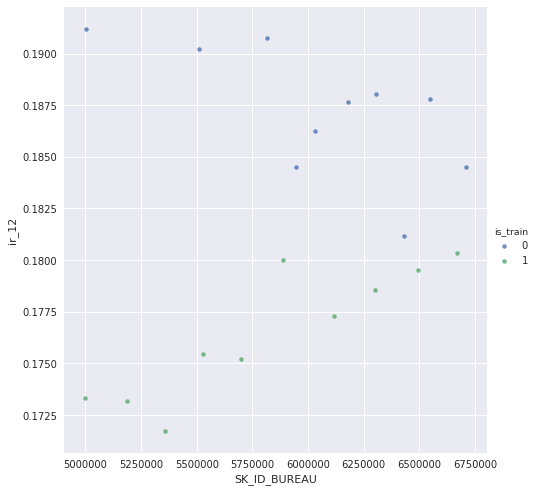

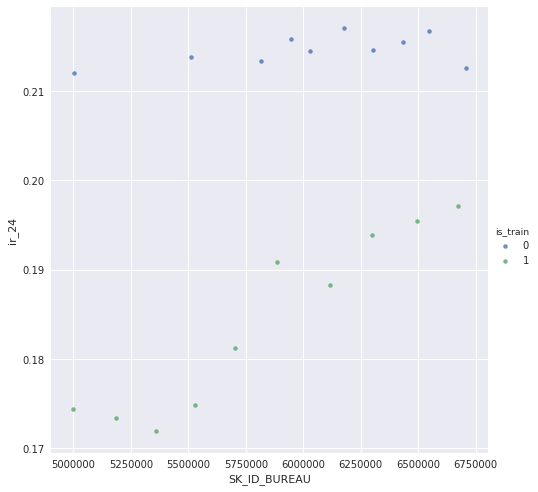

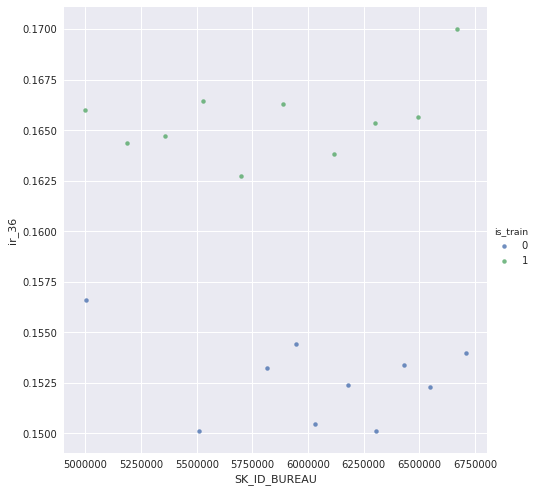

In [69]:
kb = 'SK_ID_BUREAU'
abr = abr[~abr[kb].isnull()]
tmp = abr.copy()
tmp_train = tmp[~tmp[target].isnull()]
tmp_test = tmp[tmp[target].isnull()]

bb = pd.qcut(x=tmp_train[kb], q=10)
# tmp_train[kb] = (tmp_train[kb]/1000).astype('int')
tmp_train = tmp_train.groupby(bb)[['ir_12', 'ir_24', 'ir_36']].mean().reset_index()
tmp_train[kb] = tmp_train[kb].map(lambda x:int(str(x)[1:8]))

bb = pd.qcut(x=tmp_test[kb], q=10)
# tmp_test[kb] = (tmp_test[kb]/1000).astype('int')
tmp_test = tmp_test.groupby(bb)[['ir_12', 'ir_24', 'ir_36']].mean().reset_index()
tmp_test[kb] = tmp_test[kb].map(lambda x:int(str(x)[1:8]))

tmp_train['is_train'] = 1
tmp_test['is_train'] = 0
tmp = pd.concat([tmp_train, tmp_test], axis=0)

sns.lmplot(x=kb,y='ir_12',data=tmp, fit_reg=False, size=7, scatter_kws={'s':20}, hue='is_train')
sns.lmplot(x=kb,y='ir_24',data=tmp, fit_reg=False, size=7, scatter_kws={'s':20}, hue='is_train')
sns.lmplot(x=kb,y='ir_36',data=tmp, fit_reg=False, size=7, scatter_kws={'s':20}, hue='is_train')

In [13]:
plt.figure(figsize=(10,10))

# sns.lmplot(x='SK_ID_BUREAU',y=feat1,data=bur, fit_reg=False, size=8, scatter_kws={'s':10}, hue=target)
key_b = 'SK_ID_BUREAU'
bur_train = bur_t[bur_t[target]>=0]
bur_test = bur_t[bur_t[target]<0]
bur_train[key_b].plot(kind='kde')
bur_test[key_b].plot(kind='kde')

(356255, 3)


SystemExit: 

<Figure size 720x720 with 0 Axes>

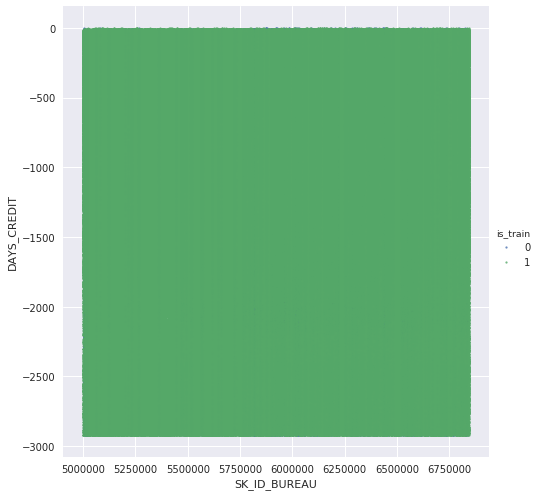

In [3]:
# bureauのDAYS_CREDITはIDの大きさと関連がないか？→なさげ
plt.figure(figsize=(10,10))
df = bur_t.copy()
df_train = df[df[target]>=0]
df_test = df[df[target]<0]
dc = 'SK_ID_BUREAU'
# dc = 'SK_ID_PREV'
df_train = df_train.groupby(dc)['DAYS_CREDIT'].mean().reset_index()
df_test = df_test.groupby(dc)['DAYS_CREDIT'].mean().reset_index()
df_train['is_train'] = 1
df_test['is_train'] = 0
df = pd.concat([df_train, df_test], axis=0)
sns.lmplot(x=dc,y='DAYS_CREDIT',data=df, fit_reg=False, size=7, scatter_kws={'s':5}, hue='is_train')